# Part 1 - Exploratory Data Analysis

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib.pyplot import figure
%matplotlib inline
sns.set(color_codes=True)

### Read in the data
#### Cursory Review of data as a whole

In [ ]:
data = pd.read_csv("mrm5_model_data.csv")

In [108]:
print(data.info)

<bound method DataFrame.info of          account_id  status  cos  rim_age  loan  s_plus_c  fico_b  ck_returns  \
0      FjWHEBLtghQ7  Closed    1        4     0         0     761         NaN   
1      NY9sb3zWSC7L  Closed    1       41     0         1     766         NaN   
2      CsgsApaKRyUc  Closed    1       42     0         1     636         NaN   
3      xtDoVry22KCc  Closed    1       42     0         1     507         NaN   
4      AY1ULa7dimU5  Closed    1       41     0         1     471         NaN   
...             ...     ...  ...      ...   ...       ...     ...         ...   
56671  klCLOY2EycCd  Active    0        0     0         1       0         NaN   
56672  Gj3ta4BAqFC6  Active    0        0     1         0       0         NaN   
56673  TyrkQdxcDaJU  Active    0        0     0         0       0         NaN   
56674  u5SzVvhz1S3U  Active    0        0     0         1       0         NaN   
56675  HbCPuxsnV1de  Active    0        0     0         1       0         NaN

In [4]:
data.describe()

,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
count,56676.000000,56676.000000,56676.000000,56676.000000,56676.000000,835.000000,56676.000000,56676.000000,56676.000000,5.122600e+04,5.039600e+04
mean,0.009104,21.966088,0.288941,0.666526,519.410932,1.450299,1.530454,0.772285,0.431947,1.474701e+04,1.606729e+04
std,0.094982,12.395577,0.453274,0.471459,330.750199,1.142533,8.795420,4.069600,1.502197,5.145974e+04,5.677016e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-4.674000e+03,-6.230000e+03
25%,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.300000e+01,4.900000e+01
50%,0.000000,22.000000,0.000000,1.000000,694.000000,1.000000,0.000000,0.000000,0.000000,1.036000e+03,1.107000e+03
75%,0.000000,33.000000,1.000000,1.000000,771.000000,1.000000,0.000000,0.000000,0.000000,8.356500e+03,9.405000e+03
max,1.000000,42.000000,1.000000,1.000000,844.000000,11.000000,376.000000,132.000000,21.000000,1.708350e+06,1.748436e+06


In [61]:
# What are the fields in the data
data.columns.tolist()

['account_id',
 'status',
 'cos',
 'rim_age',
 'loan',
 's_plus_c',
 'fico_b',
 'ck_returns',
 'max_days_neg',
 'num_times_neg',
 'ntriggers',
 'avg_bal6',
 'avg_bal3']

In [110]:
data.head()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
0,FjWHEBLtghQ7,Closed,1,4,0,0,761,NaN,0,0,0,NaN,NaN
1,NY9sb3zWSC7L,Closed,1,41,0,1,766,NaN,0,0,0,NaN,NaN
2,CsgsApaKRyUc,Closed,1,42,0,1,636,NaN,1,1,2,NaN,NaN
3,xtDoVry22KCc,Closed,1,42,0,1,507,NaN,74,12,7,NaN,NaN
4,AY1ULa7dimU5,Closed,1,41,0,1,471,NaN,1,3,2,NaN,NaN


In [7]:
data.tail()

,account_id,status,cos,rim_age,loan,s_plus_c,fico_b,ck_returns,max_days_neg,num_times_neg,ntriggers,avg_bal6,avg_bal3
56671,klCLOY2EycCd,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56672,Gj3ta4BAqFC6,Active,0,0,1,0,0,NaN,0,0,0,NaN,NaN
56673,TyrkQdxcDaJU,Active,0,0,0,0,0,NaN,0,0,0,NaN,NaN
56674,u5SzVvhz1S3U,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN
56675,HbCPuxsnV1de,Active,0,0,0,1,0,NaN,0,0,0,NaN,NaN


***
***
## Section A3 Looking at the Variables Individually - Exploratory Data Analysis

## Categorical Variables:
+ cos
+ account_id
+ status
+ loan
+ s_plus_c
+ ntriggers
+ num_times_neg
***

In [76]:
# Helper Functions
import matplotlib.pyplot as plt

def plot_catVar(var_name):
    valueCounts = data[var_name].value_counts()
    ind = list(valueCounts.index)
    val = list(valueCounts.values)
    fig = plt.figure(figsize=(30, 10))
    plt.bar(ind, val, color='blue', width=0.4)
    plt.ylabel("Counts")
    plt.xlabel(var_name.upper())
    plt.title("Counts of {} values".format(var_name.upper()))
    plt.show()
    

def check_catVar(var_name):
    unique_values = data[var_name].unique()
    valueCounts = data[var_name].value_counts()
    print("*** For the field {} ***".format(var_name))
    print("\nUnique values:\n", unique_values)
    print("\nThe value counts are:")
    print(valueCounts)
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Plot out Values")
    plot_catVar(var_name)

def check_contVar(var_name):
    print("\nCount of NULL {} values:".format(var_name), data[var_name].isnull().sum())
    print("Count of NA {} values:".format(var_name), data[var_name].isna().sum())
    print("Max value of {}:".format(var_name), data[var_name].max())
    print("Min value of {}:".format(var_name), data[var_name].min())
    print("Type of value", type(data[var_name].values))
    print("Random sample of values:\n", data[var_name].sample(n=10))


***
***
## <span style="color:red">TARGET: COS </span>
### Account Charge-Off Indicator
### Dependent or Target Variable
***

*** For the field cos ***

Unique values:
 [1 0]

The value counts are:
0    56160
1      516
Name: cos, dtype: int64

Count of NULL cos values: 0
Count of NA cos values: 0
Plot out Values


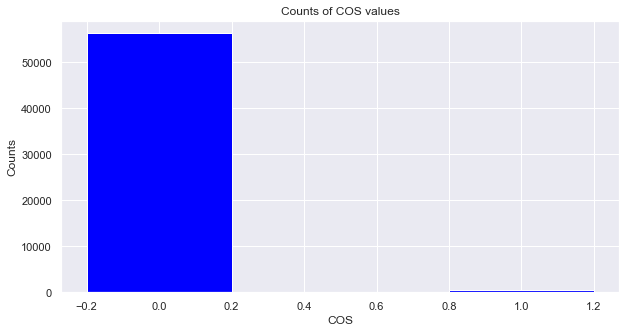

Portion of data with positive targets:  0.009104382807537581


In [30]:
check_catVar('cos')
print("Portion of data with positive targets: ", cnts[1]/(cnts[0]+cnts[1]))

***
***
## <span style="color:red">INDEX: ACCOUNT_ID </span>
***

In [32]:
# Independent Field: account_id
# is account_id unique and complete?
dups = data['account_id'].duplicated()
print("Number of duplicate account_id: ", dups.sum())
# Finding NULL values
print("Number of missing account_id:", data["account_id"].isnull().sum())

Number of duplicate account_id:  0
Number of missing account_id: 0


* **
***
## <span style="color:red">1: STATUS </span>
### Last status of account.
***

*** For the field status ***

Unique values:
 ['Closed' 'Active' 'Dormant' 'Unfunded' 'Restricted' 'Locked' 'Incomplete']

The value counts are:
Active        46256
Closed         7751
Dormant        1970
Unfunded        348
Restricted      247
Locked          100
Incomplete        4
Name: status, dtype: int64

Count of NULL status values: 0
Count of NA status values: 0
Plot out Values


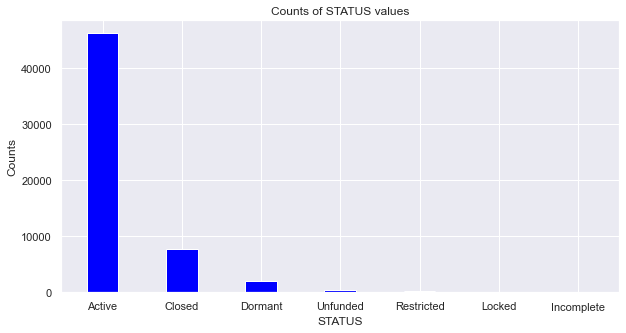

In [12]:
check_catVar('status')

In [ ]:
# How does 'status' correlates with 'cos'?

In [15]:
pd.crosstab(data['cos'],data['status'])


status,Active,Closed,Dormant,Incomplete,Locked,Restricted,Unfunded
cos,,,,,,,
0,46256,7235,1970,4,100,247,348
1,0,516,0,0,0,0,0


Discussion on STATUS field:
All cos positive accounts are closed. Not all closed account are positive
516/7235 = 0.071, or %7.1 are closed and cos positive.

* **
***
## <span style="color:red">2: LOAN</span>
### Does account have any loan product associated with it?
***

*** For the field loan ***

Unique values:
 [0 1]

The value counts are:
0    40300
1    16376
Name: loan, dtype: int64

Count of NULL loan values: 0
Count of NA loan values: 0
Plot out Values


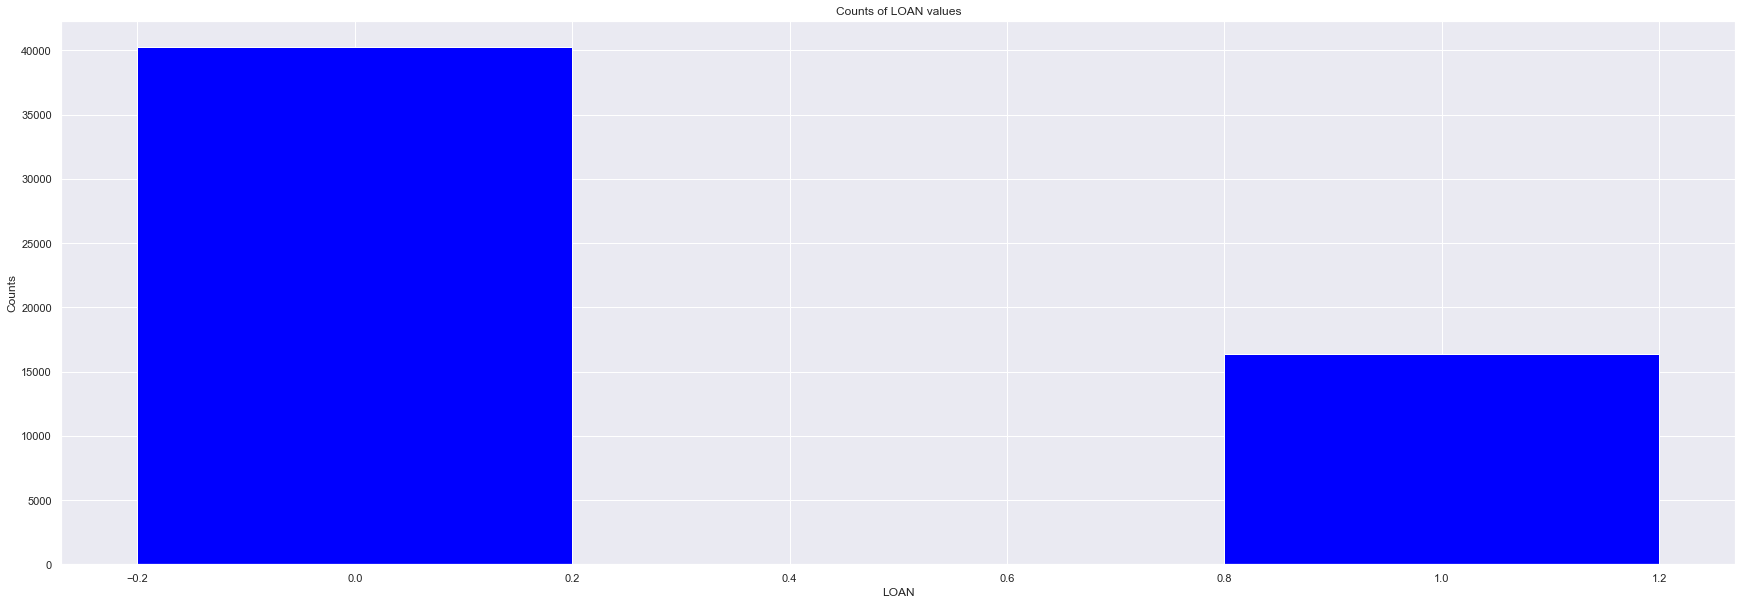

In [51]:
check_catVar('loan')

In [37]:
ct_cos_loan = pd.crosstab(data['cos'],data['loan'])
print(ct_cos_loan)

loan      0      1
cos               
0     39802  16358
1       498     18


***
### Calculations done on excel spreadsheet (not shown here)
#### P(cos yes | loan=1)	    0.00110
#### P(cos yes | loan=0)	    0.01236 (no loan associated with account)
We see here that an account that does not have a loan, has a much larger chance of resulting into a charge off account.


* **
***
## <span style="color:red">3: S_PLUS_C</span>
### Is account just savings, or savings and checking?
***

*** For the field s_plus_c ***

Unique values:
 [0 1]

The value counts are:
1    37776
0    18900
Name: s_plus_c, dtype: int64

Count of NULL s_plus_c values: 0
Count of NA s_plus_c values: 0
Plot out Values


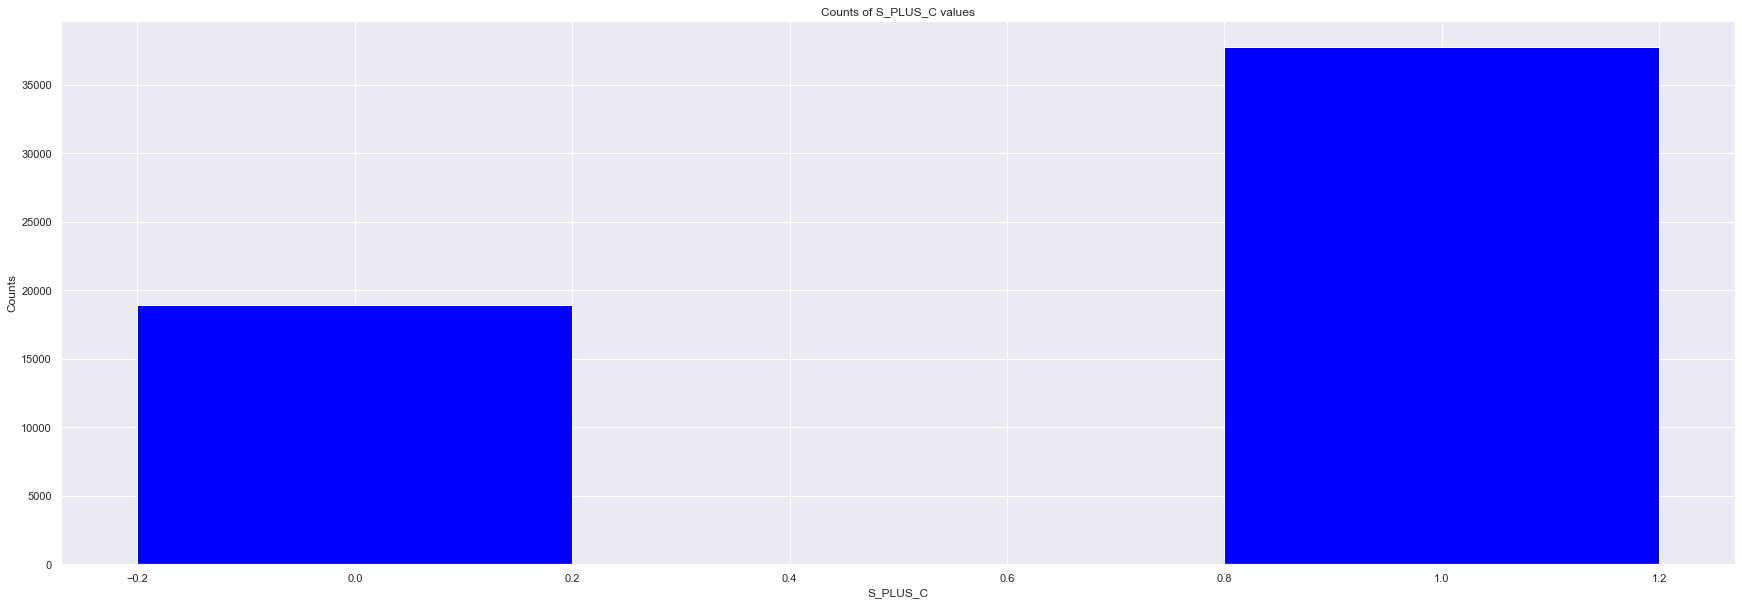

In [50]:
check_catVar('s_plus_c')

In [41]:
# Cross Tab with target field.
pd.crosstab(data['cos'],data['s_plus_c'])

s_plus_c,0,1
cos,,
0,18813,37347
1,87,429


***
### Calculations outside of this notebook (not shown here)
#### Prob(cos yes  |  s_plus_c = 1)	=  0.011356717
#### Prob(cos yes  |  s_plus_c = 0)	=  0.004603175
If an account has a checking account, it is much more likely to result in charge off than saving alone.

* **
***
## <span style="color:red">4: NTRIGGERS</span>
### Number of alerts from other financial institutions.
***

*** For the field ntriggers ***

Unique values:
 [ 0  2  7  3  6  8  9  1  4  5 16 11 12 10 13 14 15 18 21 17 20]

The value counts are:
0     49487
1      2192
2      1403
3       890
4       801
5       621
6       379
7       293
8       189
9       146
10       70
11       67
12       53
13       23
14       22
16       14
15       10
18        9
21        3
17        2
20        2
Name: ntriggers, dtype: int64

Count of NULL ntriggers values: 0
Count of NA ntriggers values: 0
Plot out Values


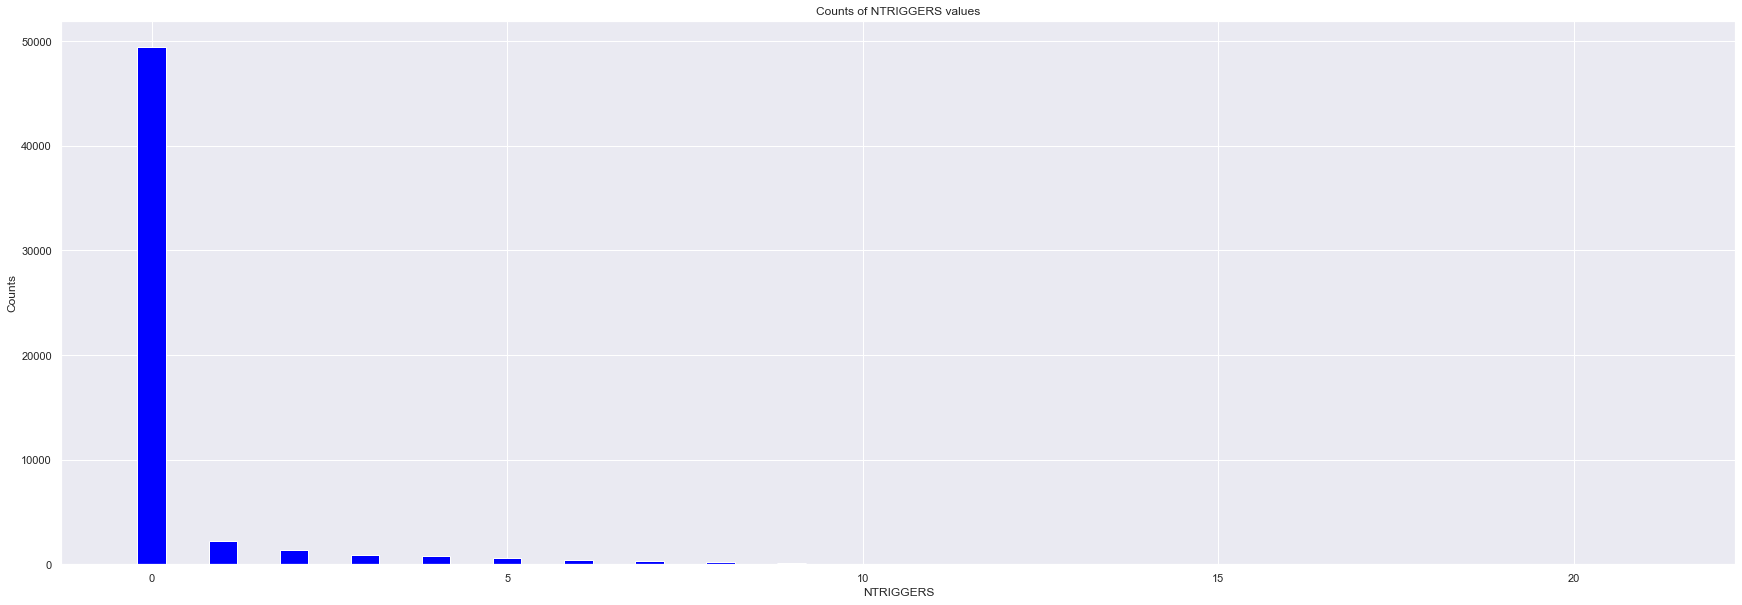

In [52]:
check_catVar('ntriggers')

In [58]:
# Cross Tab with Target Varaible
ct_cos_ntriggers = pd.crosstab(data['cos'],data['ntriggers'])
print(ct_cos_ntriggers)

ntriggers     0     1     2    3    4    5    6    7    8    9   ...  11  12  \
cos                                                              ...           
0          49303  2118  1330  829  755  589  360  283  182  141  ...  64  52   
1            184    74    73   61   46   32   19   10    7    5  ...   3   1   

ntriggers  13  14  15  16  17  18  20  21  
cos                                        
0          23  22  10  13   2   9   2   3  
1           0   0   0   1   0   0   0   0  

[2 rows x 21 columns]


<AxesSubplot:xlabel='cos'>

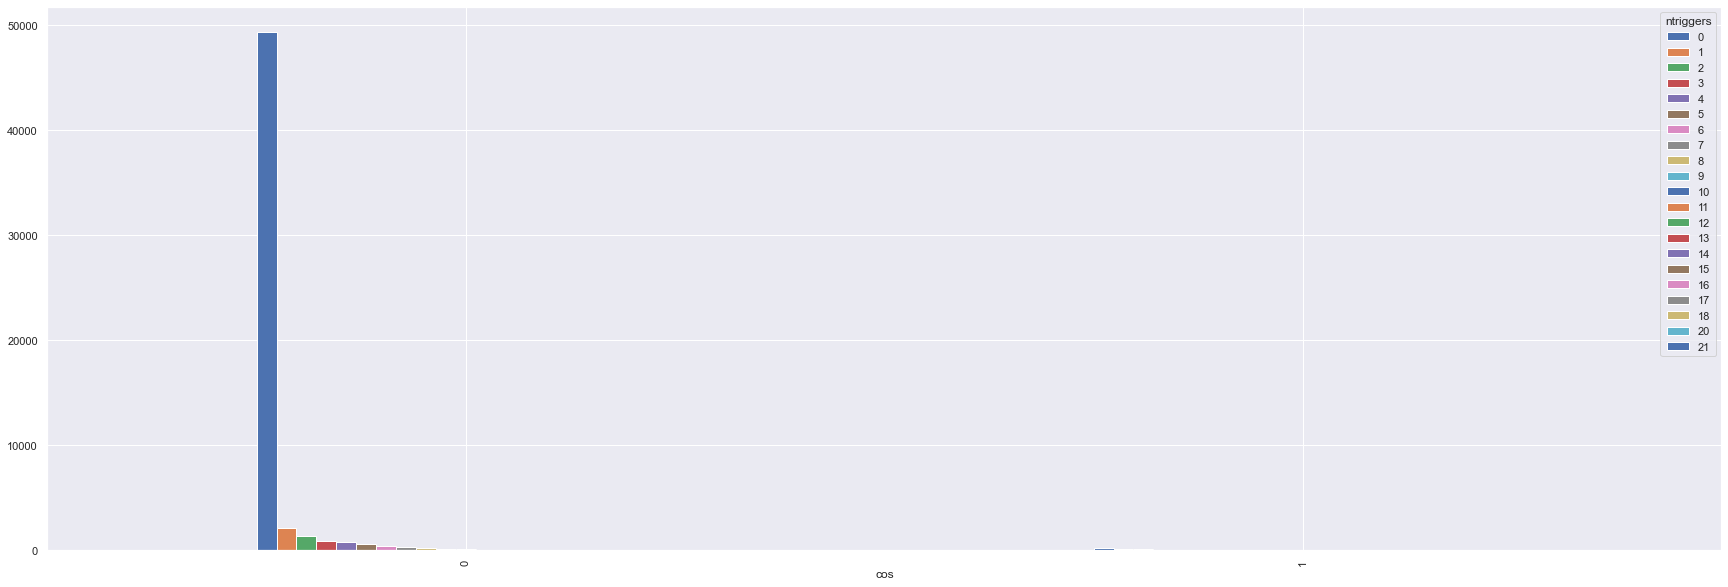

In [54]:
ct_cos_ntriggers.plot.bar(figsize=(30, 10))

***
Transform data by binning it into ntriggers<2 (bin 0) and ntriggers >= 2 (bin 1). This allows a better fitting model. This binning will prevent overfitting.

* **
***
## <span style="color:red">5: NUM_TIMES_NEG</span>
### Number of time the account went negative.
***

*** For the field num_times_neg ***

Unique values:
 [  0   1  12   3   6  25   2   5   7   8  30  58   9  31   4  14  43  11
  39  10  27  15  19  17  41  36  24  18  34  22  37  28  13  29  42  59
  16  56  35  21  67  60  48  33  38  26  20  47  94  65  32  74  23  69
  53  49  51  45  62  44  68  64 132  77  92  82  40  50 107  61  57  79
  81  75  83  63  66  78  80  46  54  52  55]

The value counts are:
0     50376
1      1933
2       952
3       595
4       398
      ...  
80        1
94        1
54        1
52        1
55        1
Name: num_times_neg, Length: 83, dtype: int64

Count of NULL num_times_neg values: 0
Count of NA num_times_neg values: 0
Plot out Values


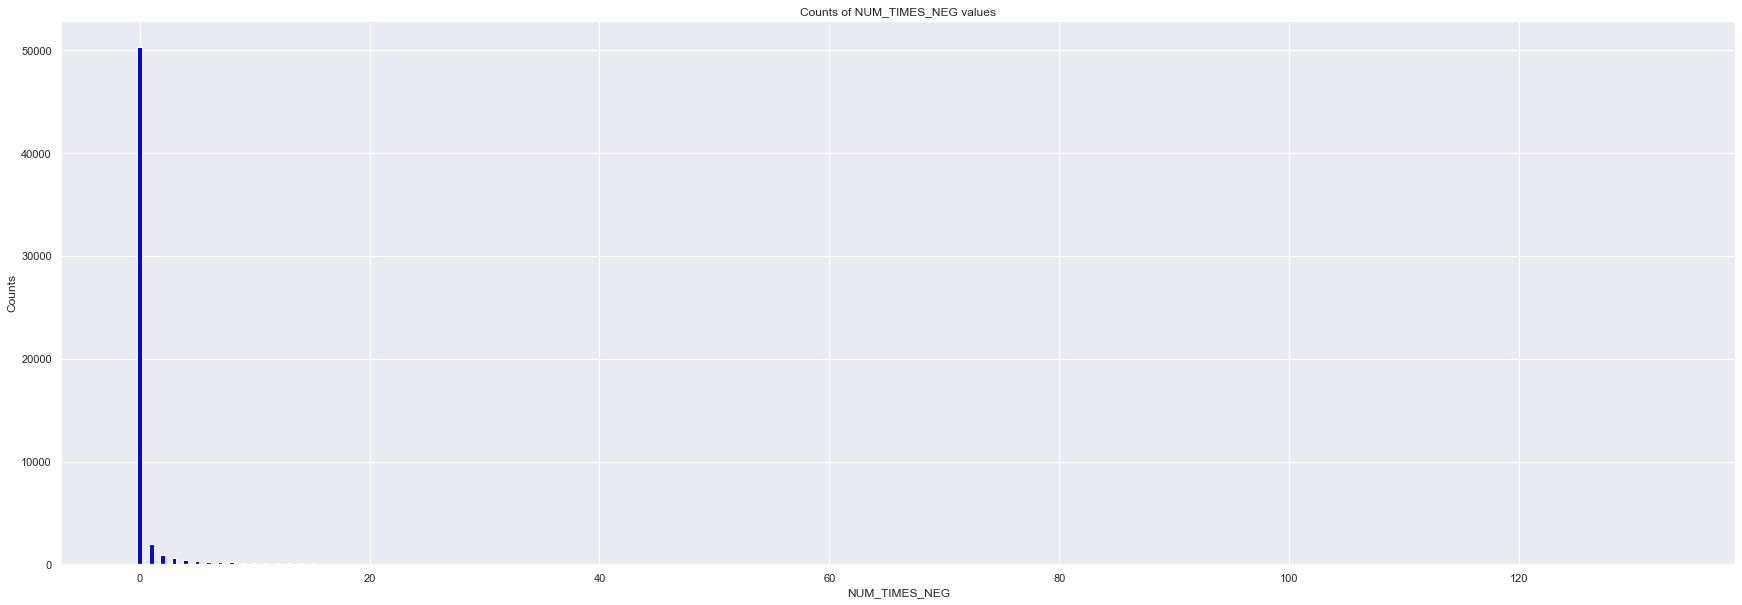

In [55]:
check_catVar('num_times_neg')

In [57]:
# Cross Tab with Target Variable
ct_cos_numtimeneg = pd.crosstab(data['cos'],data['num_times_neg'])
print(ct_cos_numtimeneg)

num_times_neg    0     1    2    3    4    5    6    7    8    9    ...  78   \
cos                                                                 ...        
0              50283  1842  877  550  374  276  227  192  171  153  ...    1   
1                 93    91   75   45   24   16   21   15   14   15  ...    0   

num_times_neg  79   80   81   82   83   92   94   107  132  
cos                                                         
0                1    1    1    2    2    1    1    1    1  
1                0    0    0    0    0    0    0    0    0  

[2 rows x 83 columns]


* **
***
## <span style="color:red">6: MAX_DAYS_NEG</span>
### Maximum consecutive days account was negative.
***

*** For the field max_days_neg ***

Unique values:
 [  0   1  74   6   7   5  53   9   2  12  11  33   3  29  31  10  21  36
  15  17  59  43  18  38  37   4  42  13  30  85  62  68  39  14  67  23
   8  26  41  45  56  49  32  88  57  28  34  27  16  93  66 135  91  48
 114  71  22  25  72  69 110  61 138 133  81  19  24  65  89  35  83 134
 111  54  95 108  20  40 137  75  78 376  47 121 131 141 147  46  64 100
  58 102  87 127  55  70  86 129 106  82 105 119  52 101  51  60  63 120
  44  98  76 132 124  99 113 116  92  50  73 123 115  94 109  79 118  90
 145 122 146 136 112  77 107  84  96 103 125 117 104 130 128  80 126]

The value counts are:
0      50376
1       1059
2       1042
3        665
4        377
       ...  
136        1
146        1
145        1
132        1
134        1
Name: max_days_neg, Length: 143, dtype: int64

Count of NULL max_days_neg values: 0
Count of NA max_days_neg values: 0
Plot out Values


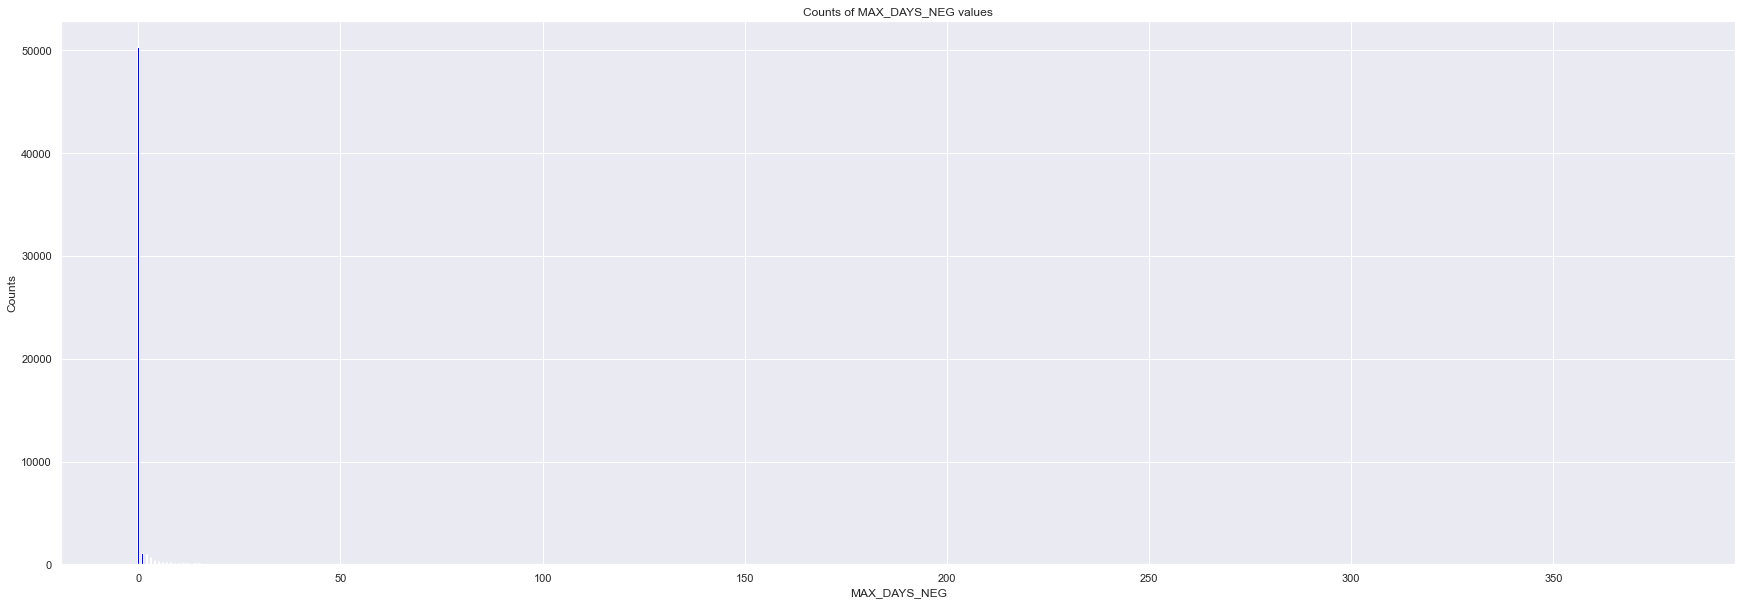

In [56]:
check_catVar('max_days_neg')

***
## Continuous Variables:
+ RIM_AGE
+ FICO_B
+ CK_RETURNS
+ AVG_BAL6
+ AVG_BAL3

* **
***
## <span style="color:red">7: RIM_AGE</span>
### Age of the accout owner's membership in months
***

In [78]:
check_contVar('rim_age')


Count of NULL rim_age values: 0
Count of NA rim_age values: 0
Max value of rim_age: 42
Min value of rim_age: 0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 20913     1
2378     41
11520    15
11859    14
18936     8
30906    23
35278    16
52339     8
42856    23
2459     41
Name: rim_age, dtype: int64


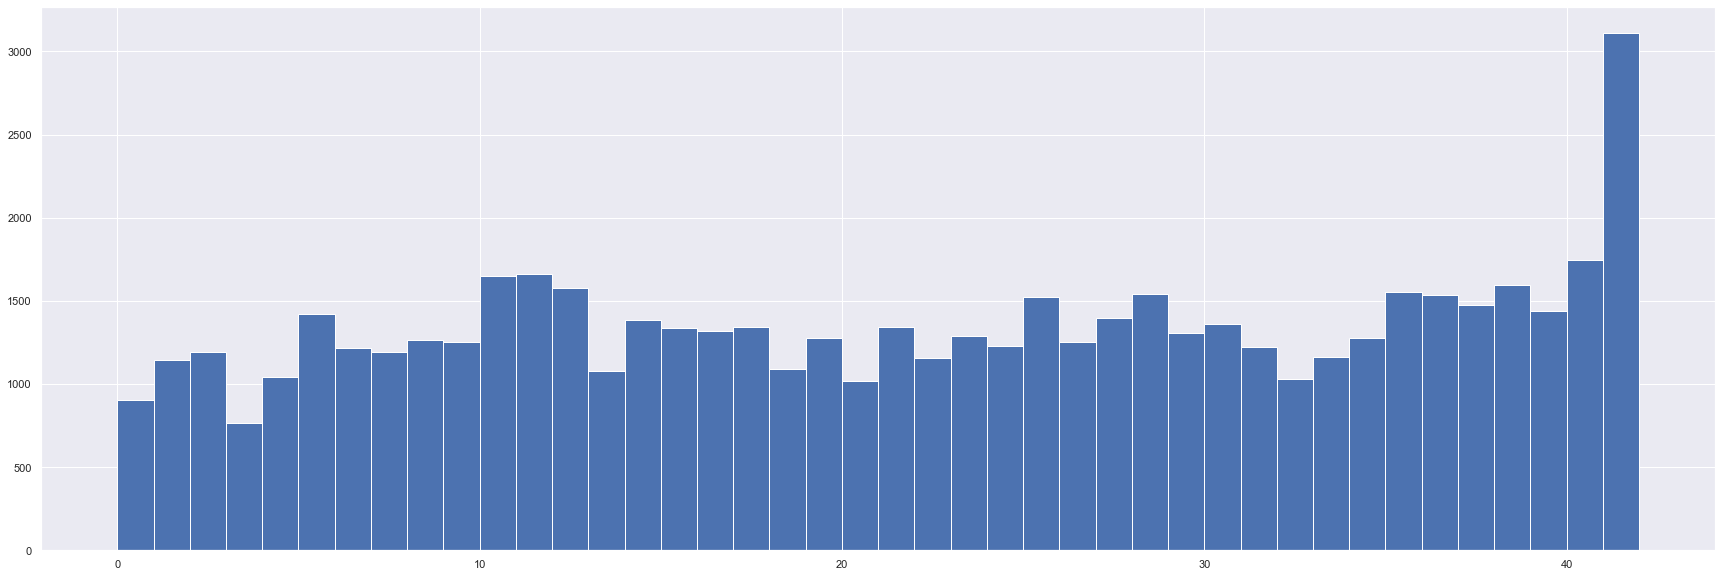

In [98]:
plt.hist(data['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

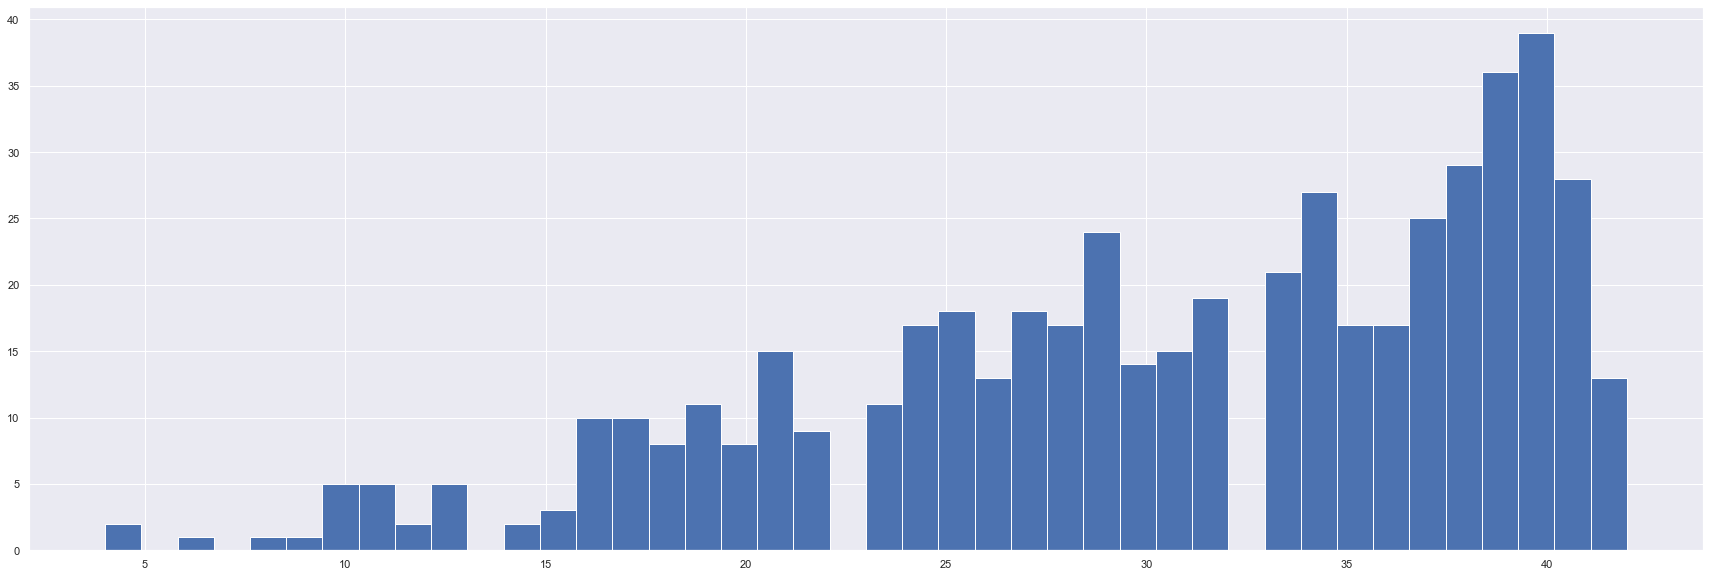

In [99]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['rim_age'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">8: CK_RETURNS</span>
### Number of returned checks since Jan. 2017
***

In [119]:
check_contVar('ck_returns')


Count of NULL ck_returns values: 55841
Count of NA ck_returns values: 55841
Max value of ck_returns: 11.0
Min value of ck_returns: 1.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 31668   NaN
32327   NaN
40519   NaN
4048    NaN
47461   NaN
43844   NaN
20443   NaN
2978    NaN
27531   NaN
37521   NaN
Name: ck_returns, dtype: float64


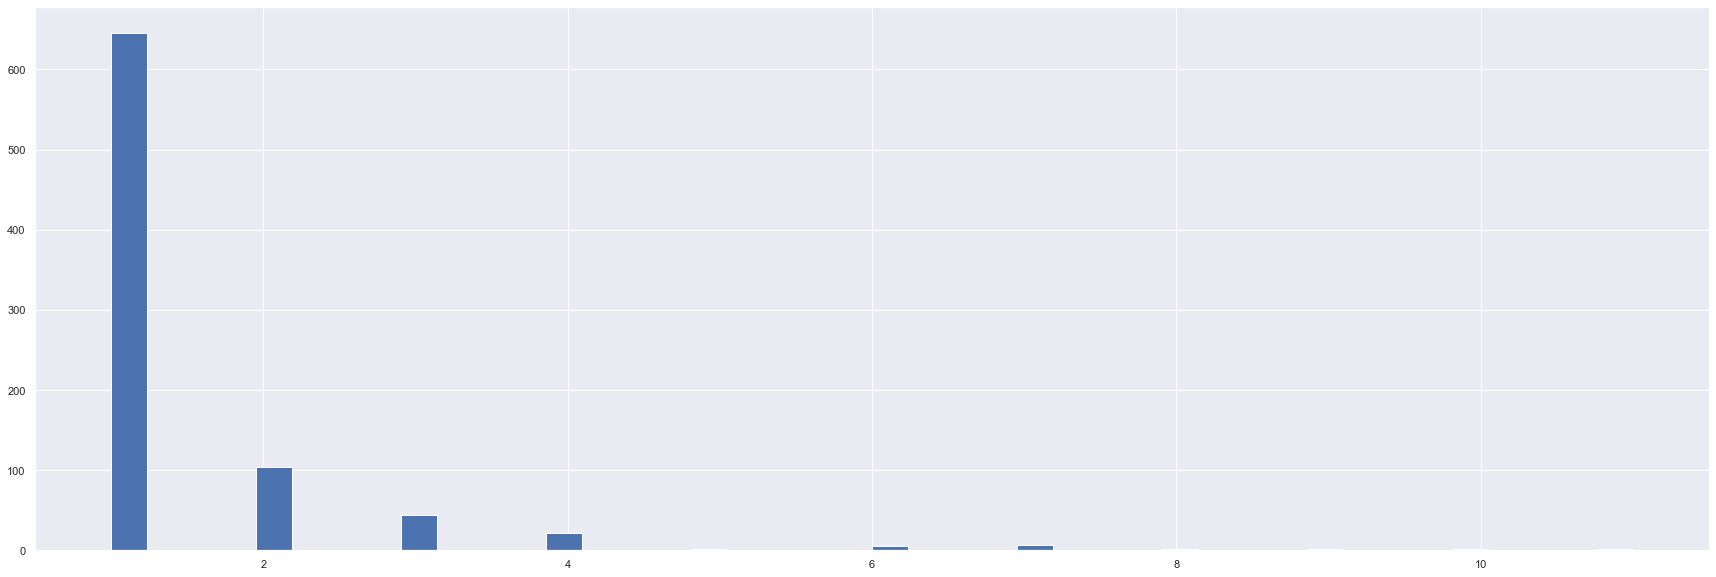

In [120]:
plt.hist(data['ck_returns'], bins=42)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">9: FICO_B</span>
### FICO credit score
***

In [100]:
check_contVar("fico_b")


Count of NULL fico_b values: 0
Count of NA fico_b values: 0
Max value of fico_b: 844
Min value of fico_b: 0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 4042     704
19921      0
56521      0
45929      0
202      463
27207    749
36512    807
13931    709
19444      0
31103      0
Name: fico_b, dtype: int64


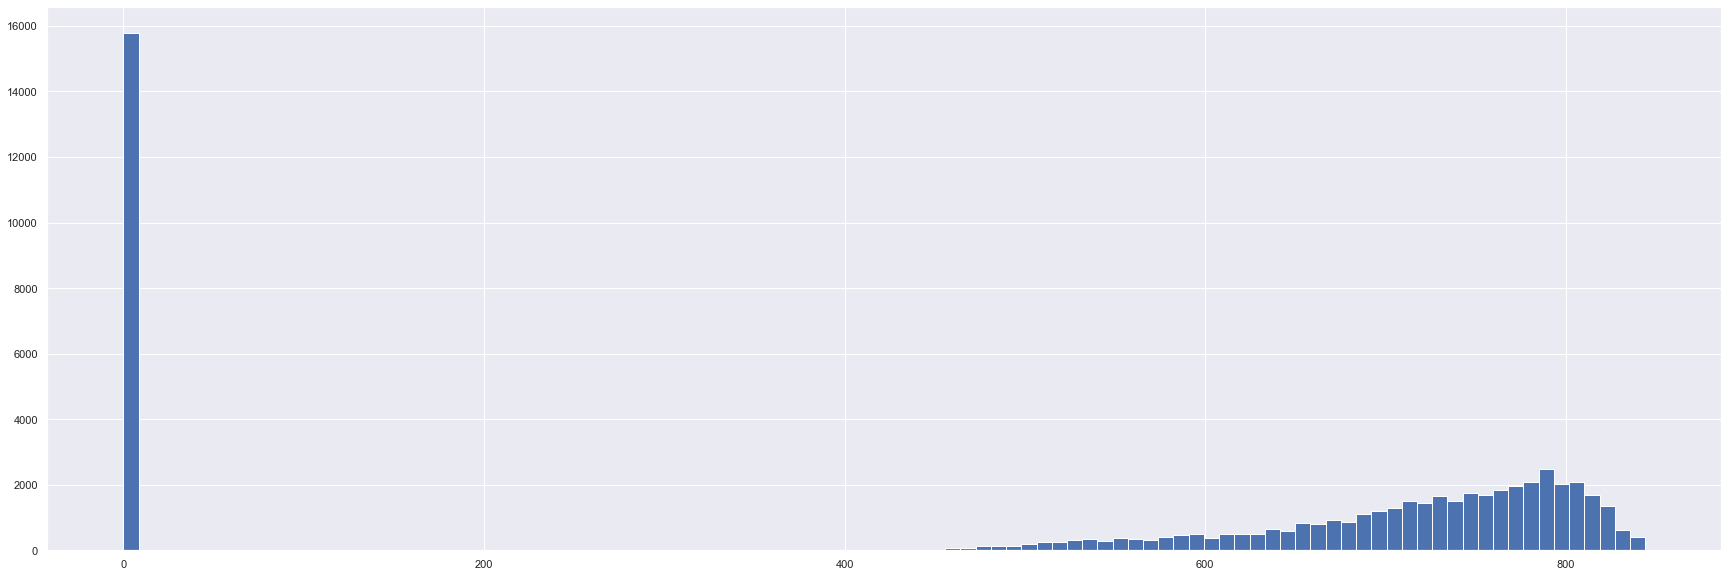

In [112]:
plt.hist(data['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

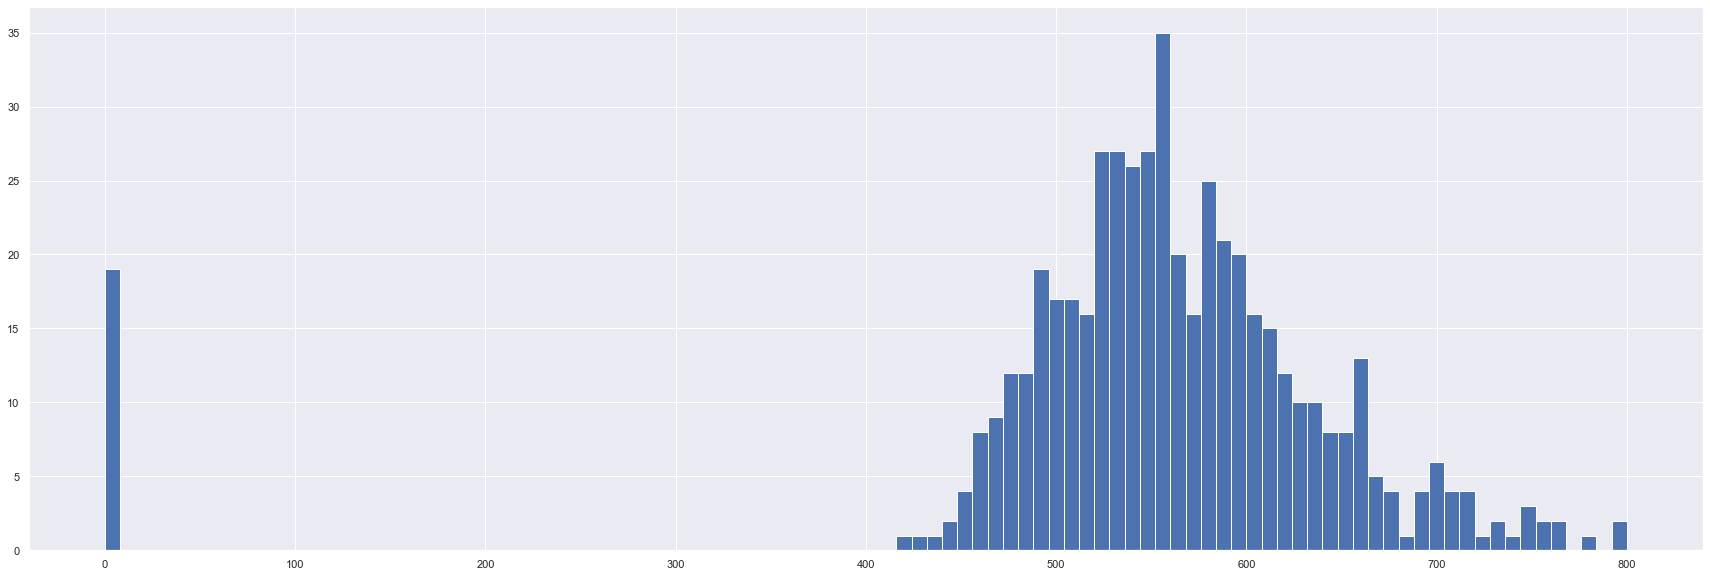

In [113]:
# what is the distribution of rim_age among those that have COS?
data_cosPOS = data[data['cos'].values == 1].copy(deep=True)
plt.hist(data_cosPOS['fico_b'], bins=100)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [107]:
# How many fico scores are 0?
COSall_FICO_Zero = data[data['fico_b'] == 0]
print("Count of FICO scores = 0: ", COSall_FICO_Zero.shape[0])
COSpos_FICO_Zero = data[(data['fico_b'] == 0) & (data['cos'] == 1)]
print("Count of FICO scores = 0 AND COS positive: ", COSpos_FICO_Zero.shape[0])

Count of FICO scores = 0:  15795
Count of FICO scores = 0 AND COS positive:  19


* **
***
## <span style="color:red">10: AVG_BAL6</span>
### Rolling 6-month deposit amount
***

In [111]:
check_contVar('avg_bal6')


Count of NULL avg_bal6 values: 5450
Count of NA avg_bal6 values: 5450
Max value of avg_bal6: 1708350.0
Min value of avg_bal6: -4674.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 55321       125.0
44307       724.0
46754       330.0
42086        48.0
14203      2457.0
49279         NaN
5620      13546.0
39328     10993.0
13055      6481.0
26973    210159.0
Name: avg_bal6, dtype: float64


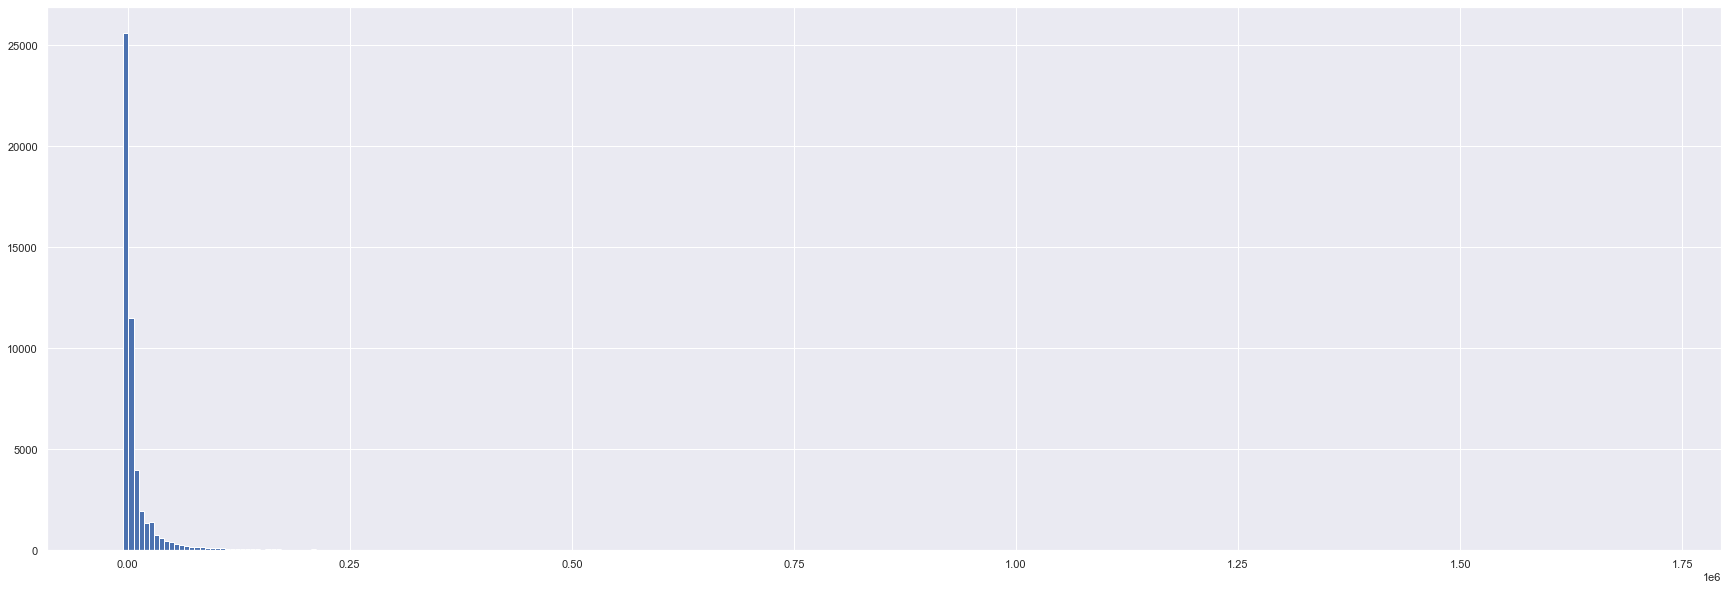

In [115]:
plt.hist(data['avg_bal6'], bins=300)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

* **
***
## <span style="color:red">11: AVG_BAL3</span>
### Rolling 3-month deposit amount
***

In [117]:
check_contVar('avg_bal3')


Count of NULL avg_bal3 values: 6280
Count of NA avg_bal3 values: 6280
Max value of avg_bal3: 1748436.0
Min value of avg_bal3: -6230.0
Type of value <class 'numpy.ndarray'>
Random sample of values:
 50149    10330.0
15859        5.0
14205       46.0
28551    24994.0
56225        NaN
38176     2091.0
23474        NaN
7608       463.0
19773     1664.0
52398        5.0
Name: avg_bal3, dtype: float64


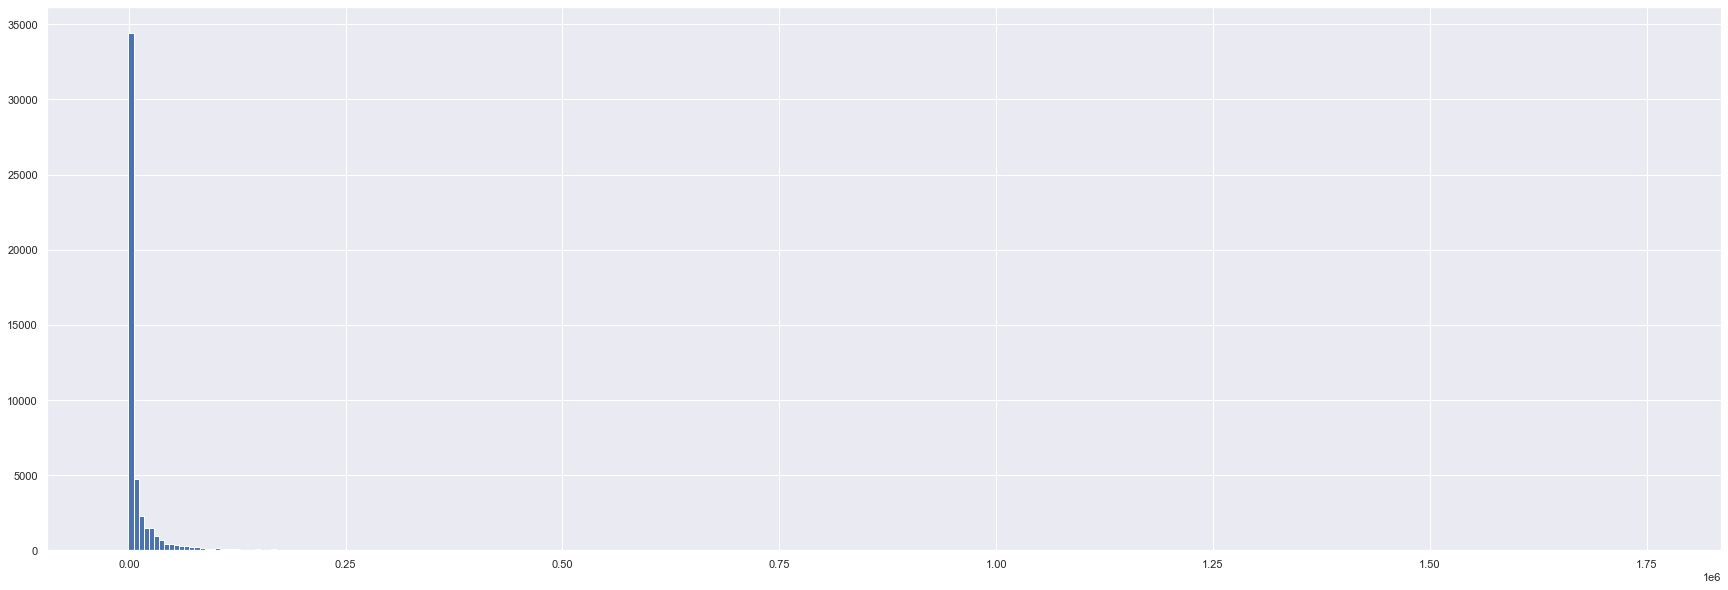

In [118]:
plt.hist(data['avg_bal3'], bins=300)
plt.rcParams['figure.figsize'] = (30,10)
plt.show()